#Alzheimer's Mice ANOVA

#Importing relevant libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Loading dataset

In [2]:
df = pd.read_csv('AlzheimersMiceData.csv')

In [11]:
df.head()

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13


#Assumptions

##Normallity

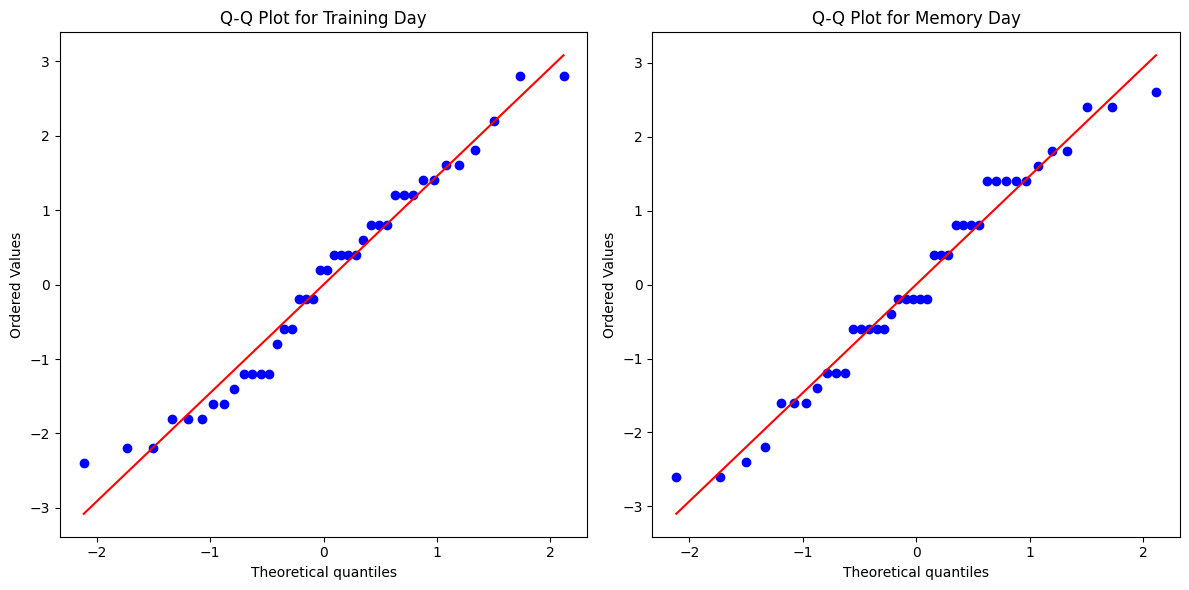

In [12]:
# Check Normality with Q-Q plots for both models
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Training Day
stats.probplot(model_training.resid, dist="norm", plot=ax[0])
ax[0].set_title('Q-Q Plot for Training Day')

#Memory Day
stats.probplot(model_memory.resid, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot for Memory Day')

plt.tight_layout()
plt.show()

##Homogeneity

###Grouping fo Levene's

In [24]:
groups_training = df.groupby(['AD_Status', 'Treatment'])['Training'].apply(list)
groups_memory = df.groupby(['AD_Status', 'Treatment'])['Memory'].apply(list)

###Flattening groups

In [23]:
levene_training = stats.levene(*groups_training)
levene_memory = stats.levene(*groups_memory)

###Homogeneity - Training

In [25]:
levene_training

LeveneResult(statistic=0.4346076458752513, pvalue=0.8730505780891101)

This result is not statistically significant, indicating that the variances are roughly equal across the groups for the Training Day errors. This supports the homogeneity of variances assumption.

###Homogeneity - Memory

In [26]:
levene_memory

LeveneResult(statistic=0.8274582560296846, pvalue=0.5722200263972532)

This result is also not statistically significant, suggesting that the variances are roughly equal across the groups for the Memory Day errors. This meets the homogeneity of variances assumption.

#ANOVA

##Training

In [7]:
model_training = ols('Training ~ C(AD_Status) * C(Treatment)', data=df).fit()
anova_training = sm.stats.anova_lm(model_training, typ=2)

anova_training

,sum_sq,df,F,PR(>F)
C(AD_Status),3.025,1.0,1.216080,0.278356
C(Treatment),28.275,3.0,3.788945,0.019678
C(AD_Status):C(Treatment),9.075,3.0,1.216080,0.319771
Residual,79.600,32.0,NaN,NaN


###Alzheimeer's Disease Status

F=1.216, p=0.278

This result is not statistically significant, suggesting that AD status does not have a significant main effect on the number of errors made during the Training Day.

###Treatment

F=3.789, p=0.020
This result is statistically significant, indicating that the type of drug treatment does have a significant main effect on the number of errors made during the Training Day.

###Interaction between AD Status and Treatment

F(3,32)=1.216, p=0.320
This result is not statistically significant, suggesting that there is no significant interaction effect between AD status and drug treatment on the Training Day errors.

##Memory

In [9]:
model_memory = ols('Memory ~ C(AD_Status) * C(Treatment)', data=df).fit()
anova_memory = sm.stats.anova_lm(model_memory, typ=2)

anova_memory

,sum_sq,df,F,PR(>F)
C(AD_Status),189.225,1.0,75.313433,6.449421e-10
C(Treatment),14.475,3.0,1.920398,1.461176e-01
C(AD_Status):C(Treatment),8.675,3.0,1.150912,3.436263e-01
Residual,80.400,32.0,NaN,NaN


###Alzheimeer's Disease Status

F=75.313, p < 0.0001

This result is highly statistically significant, indicating that AD status has a significant main effect on the number of errors made during the Memory Day. This suggests a strong difference in memory performance between transgenic and wild-type mice.

###Treatment

F=1.920, p=0.146

This result is not statistically significant, suggesting that the type of drug treatment does not have a significant main effect on the number of errors made during the Memory Day.

###Interaction between AD Status and Treatment

F(3,32)=1.151, p=0.344

This result is not statistically significant, indicating that there is no significant interaction effect between AD status and drug treatment on the Memory Day errors.

##Summary of ANPVA results

For the Training Day, the type of drug treatment had a significant effect on the number of errors made by the mice, while the AD status and the interaction between AD status and drug treatment did not show significant effects.

For the Memory Day, the AD status showed a highly significant effect, indicating a clear difference in memory performance between transgenic and wild-type mice. However, the type of drug treatment and the interaction between AD status and drug treatment did not show significant effects.

#Conclusion

These results suggest that while drug treatment affects learning ability (as shown in Training Day errors), the AD status plays a more critical role in memory retention (as shown in Memory Day errors). The lack of significant interaction effects implies that the influence of drug treatment on error rates does not differ markedly between transgenic and wild-type mice.